### RSI
RSI（相对强弱指数）是一种动量指标，用于衡量价格在一定时间内的涨跌速度和变化幅度，帮助交易者判断市场是否处于超买或超卖状态。

+ 当 RSI 超过70时，市场可能处于超买区，意味着价格可能回调；
+ 当 RSI 低于30时，市场可能处于超卖区，意味着价格可能反弹。

In [5]:
# 获取数据源
import baostock as bs
import pandas as pd
import logging
import numpy as np

def get_k_data(code, start, end):
    lg = bs.login()
    # 显示登陆返回信息
    logging.info('login respond error_code:' + lg.error_code)
    logging.info('login respond  error_msg:' + lg.error_msg)
    # 获取股票数据
    rs = bs.query_history_k_data_plus(code,
                                              "date,open,high,low,close,volume",
                                              start_date=start,
                                              end_date=end,
                                              frequency="d",
                                              adjustflag="3")  # adjustflag="3"表示不复权
    data = rs.get_data()


    # 登出baostock系统
    bs.logout()

    # 创建DataFrame
    df = data[['date', 'open', 'high', 'low', 'close', 'volume']].rename(columns={'date': 'Date'})

    # 转换日期格式
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)  # 设置日期列为索引

    # 将空字符串替换为 NaN
    df[['open', 'high', 'low', 'close', 'volume']] = df[['open', 'high', 'low', 'close', 'volume']].replace('', np.nan)
    # 去除包含空值的行
    df = df.dropna(subset=['open', 'high', 'low', 'close', 'volume'])

    # 将股价数据转换为数值类型
    df[['open', 'high', 'low', 'close', 'volume']] = df[['open', 'high', 'low', 'close', 'volume']].astype(float)
    return df


In [6]:
stock_code = "sh.603486"  # 沪深300
start_date = "2024-01-01"
end_date = "2025-12-31"

df = get_k_data(stock_code, start_date, end_date)

login success!
logout success!


In [7]:
import talib

# RSI 计算
# 计算 RSI，假定 df 中有 "close" 收盘价列
df['RSI'] = talib.RSI(df['close'].values, timeperiod=14)

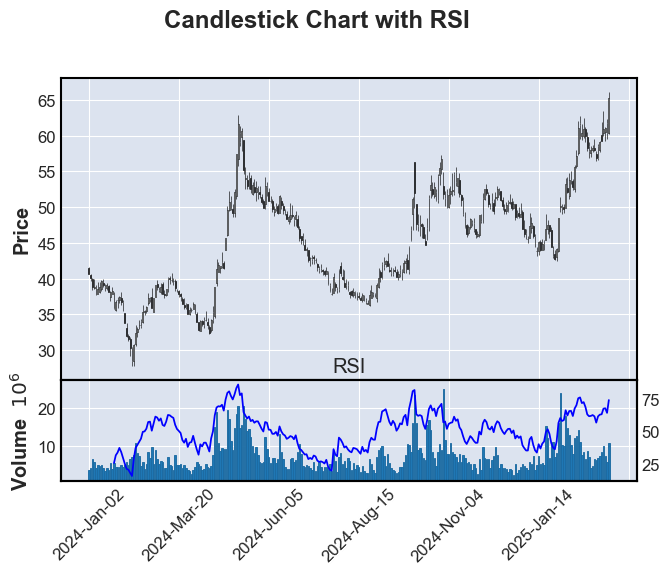

In [8]:

import mplfinance as mpf

# 准备额外绘图区：设置 RSI 显示在 panel=1
apds = [mpf.make_addplot(df['RSI'], panel=1, color='blue', title='RSI')]

# 绘制 K 线图以及 RSI 子图
mpf.plot(df, type='candle', addplot=apds,
         title='Candlestick Chart with RSI',
         volume=True,  # 显示成交量子图
         panel_ratios=(3,1))  # K线图与RSI子图高度比例